In [7]:
 import numpy as np
 from tensorflow.keras.layers import Dense, Dropout, Input
 from tensorflow.keras.layers import Conv2D, MaxPooling2D
 from tensorflow.keras.layers import Flatten, concatenate
 from tensorflow.keras.models import Model
 from tensorflow.keras.utils import to_categorical
 from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Conv2DTranspose,UpSampling2D

In [46]:
!pip install graphviz pydot


In [8]:
"""#create x_train , y_train , preprocess the data ? 
x_train, y_train 


def functo (img_dir_path)
    return data

x_train = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/train/images')
x_val = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/val/images')
x_test = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/test/images')

def  function_desity()
    return data


y_train = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')
y_test = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')
y_val = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')



def preprocess 
    normalize 
    rbg ? 
"""

"#create x_train , y_train , preprocess the data ? \nx_train, y_train \n\n\ndef functo (img_dir_path)\n    return data\n\nx_train = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/train/images')\nx_val = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/val/images')\nx_test = functo('/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/test/images')\n\ndef  function_desity()\n    return data\n\n\ny_train = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')\ny_test = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')\ny_val = function_density('/kaggle/input/jhu-crowdv2-density-maps/test_densities')\n\n\n\ndef preprocess \n    normalize \n    rbg ? \n"

In [9]:
#model parameters 


In [10]:
# Model 
#three parallel layers 

# conv(9x9)  pool(2x2)-> conv(7x7)  pool(2x2)-> conv(7x7) ->conv(7x7) ->
# conv(7x7)  pool(2x2)-> conv(5x5)  pool(2x2)-> conv(5x5) ->conv(5x5) ->          -> concatenate -> conv(1x1) -> density map
# conv(5x5)  pool(2x2)-> conv(3x3)  pool(2x2)-> conv(3x3) ->conv(3x3) ->







In [11]:
image_path='/kaggle/input/jhu-crowd-v2-0/jhu_crowd_v2.0/jhu_crowd_v2.0/train/images/0001.jpg'
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)

left_inputs = Input(shape=img.shape)
inputs = left_inputs

In [36]:
#left layer
left_inputs = Input(shape=(None, None, 3))

x = Conv2D(16, 9, activation='relu', padding='same',dilation_rate=1)(left_inputs)
x = Conv2D(32, 7, activation='relu', padding='same',dilation_rate=2)(x)

x = Conv2D(16, 7, activation='relu', padding='same',dilation_rate=4)(x)
x = Conv2D(8, 7, activation='relu', padding='same',dilation_rate=8)(x)


x = Conv2DTranspose(16, 7, strides=1, padding='same', activation='relu',dilation_rate=4)(x)
x = Conv2DTranspose(32, 7, strides=1, padding='same', activation='relu',dilation_rate=2)(x)  # ↑ ×2
x = Conv2DTranspose(16, 9, strides=1, padding='same', activation='relu',dilation_rate=1)(x)  # ↑ ×2

x = Conv2D(3, 3, activation='sigmoid', padding='same')(x)


In [37]:
#middle layer
middle_inputs = Input(shape=(None, None, 3))

y = Conv2D(20, 7, activation='relu', padding='same',dilation_rate=1)(middle_inputs)
y = Conv2D(40, 5, activation='relu', padding='same',dilation_rate=2)(y)

y = Conv2D(20, 5, activation='relu', padding='same',dilation_rate=4)(y)
y= Conv2D(10, 5, activation='relu', padding='same',dilation_rate=8)(y)


y = Conv2DTranspose(20, 5, strides=1, padding='same', activation='relu',dilation_rate=4)(y)
y = Conv2DTranspose(40, 5, strides=1, padding='same', activation='relu',dilation_rate=2)(y)  # ↑ ×2
y = Conv2DTranspose(20, 7, strides=1, padding='same', activation='relu',dilation_rate=1)(y)  # ↑ ×2

y = Conv2D(3, 3, activation='sigmoid', padding='same')(y)

In [38]:
#right layer
right_inputs = Input(shape=(None, None, 3))

z = Conv2D(24, 5, activation='relu', padding='same',dilation_rate=1)(right_inputs)
z = Conv2D(48, 3, activation='relu', padding='same',dilation_rate=2)(z)

z = Conv2D(24, 3, activation='relu', padding='same',dilation_rate=4)(z)
z= Conv2D(12, 3, activation='relu', padding='same',dilation_rate=8)(z)


z = Conv2DTranspose(24, 3, strides=1, padding='same', activation='relu',dilation_rate=4)(z)
z = Conv2DTranspose(48, 3, strides=1, padding='same', activation='relu',dilation_rate=2)(z)  # ↑ ×2
z = Conv2DTranspose(24, 5, strides=1, padding='same', activation='relu',dilation_rate=1)(z)  # ↑ ×2

z = Conv2D(3, 3, activation='sigmoid', padding='same')(z)

In [44]:
c=concatenate([x,y,z])

c=Conv2D(1,1,activation='relu',padding='same')(c)
model=Model([left_inputs,middle_inputs,right_inputs],c)

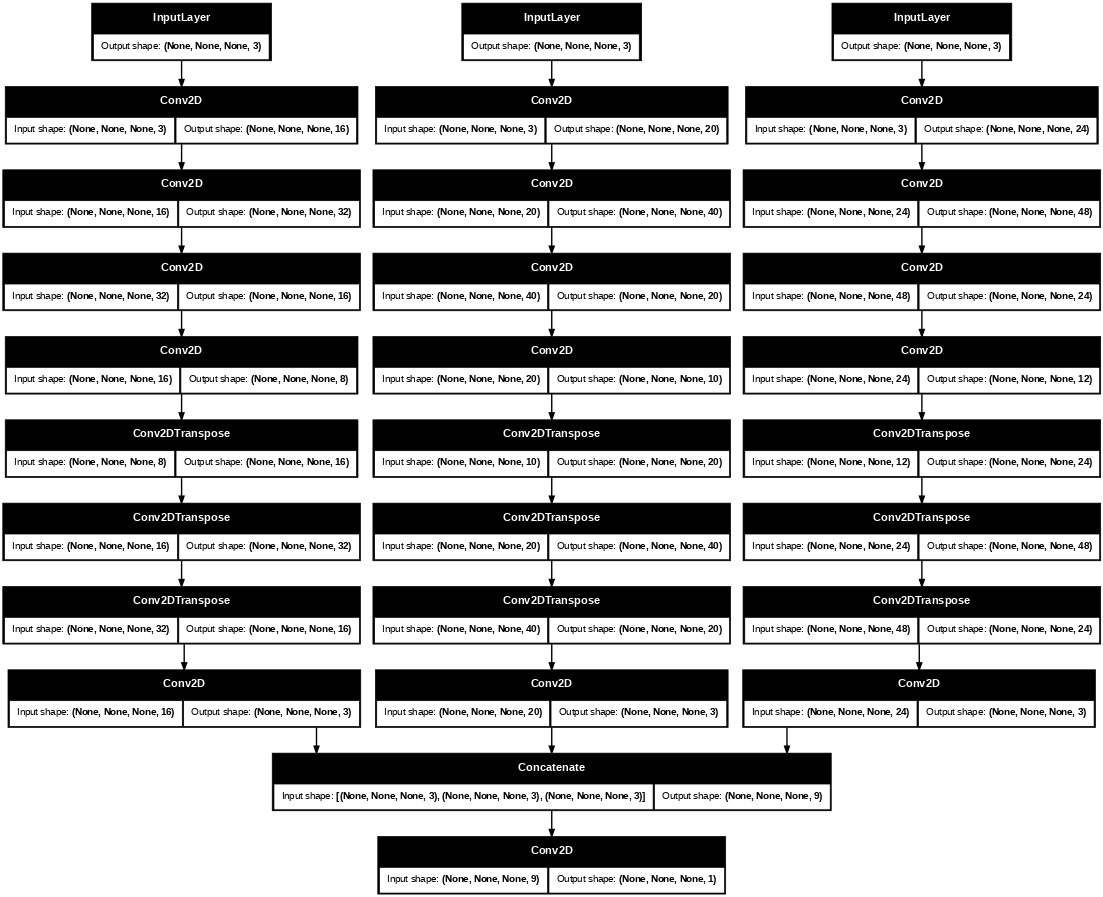

In [49]:
plot_model(model, to_file='model.png', show_shapes=True, dpi=50)


In [ ]:
img=tf.reshape(img,(1,513,730,3))
out=model.predict(img)


In [ ]:
print(f"input_image_shape:",img.shape)
print(f"output_image_shape:",out.shape)